# Description of the Notebook

In [1]:
import roundtrip_path_planner
import IPTestSuiteSS2023

# Definition StartPos, TargetPosList, Environment

Aufruf des Benchmarks, der Startpos und TargetPosList (wie im IP-X-0-Automated_PlannerTest.ipynb)

In [2]:
import importlib
importlib.reload(roundtrip_path_planner)

<module 'roundtrip_path_planner' from '/home/moritz_s/Documents/RKIM_1/Roboterprogrammierung/Projektarbeit_Robot_Path_Planning/Roundtrip_Path_Planning/roundtrip_path_planner/roundtrip_path_planner.py'>

visibilityPRM_custom [<class 'IPVisibilityPRM_Customized.VisPRM_Custom'>, {'ntry': 300}, <function visibilityPRM_custom_Visualize at 0x751af8d46de0>]
Planning: visibilityPRM_custom - Trap
Usedstart: [10, 15]
Pastgoals: [[12, 6], [10, 3], [8, 4]]
tmp_1: [[10, 15]]
tmp_2: [[12, 6]]
Solution_Visibility ist ['start', 185, 2, 7, 'goal']
StatsHandler: {0: [10, 15], 1: [12, 6], 2: [2.1581647031334787, 9.90666964815881], 3: [17.58207267029547, 10.265899913359721], 4: [3.63404103302237, 17.80957308040885], 5: [20.01919816845737, 0.718035731771332], 6: [1.9703364474209866, 11.056491386307826], 7: [1.3842123619030982, 5.4253099333918575], 8: [10.206937976041033, 18.302049389347705], 9: [10.632928749509269, 21.352226498868056], 10: [1.881426978036913, 18.11446354791203], 11: [5.112266861259606, 1.1870710200168808], 12: [0.25062557657864426, 11.021568479464367], 13: [13.292403272409448, 2.9241398098721323], 14: [21.577990649716533, 16.082172074923324], 15: [21.91563413681792, 13.831133077523273], 1

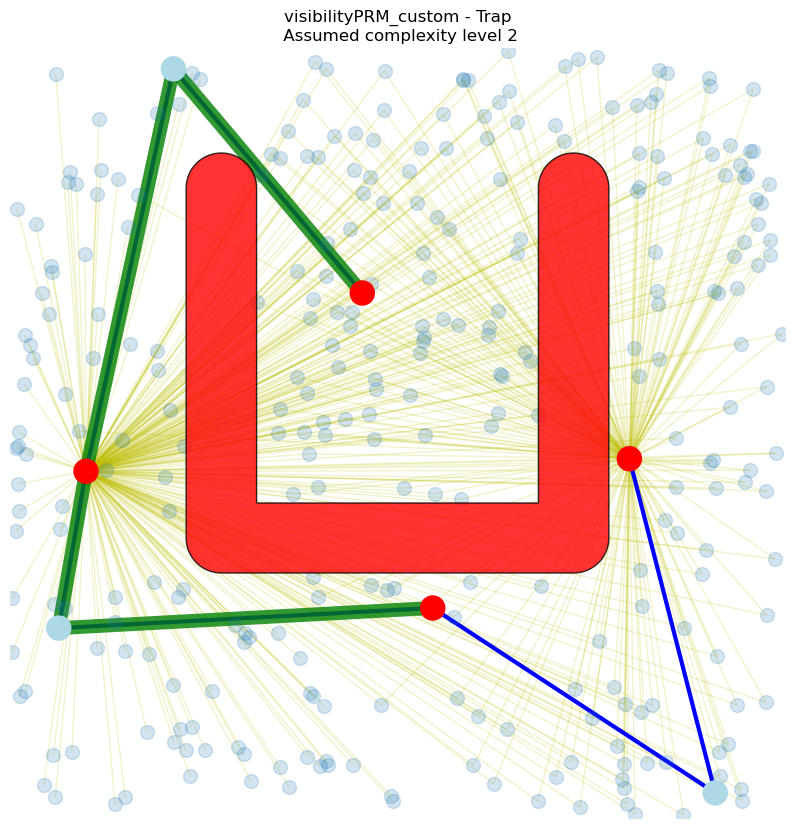

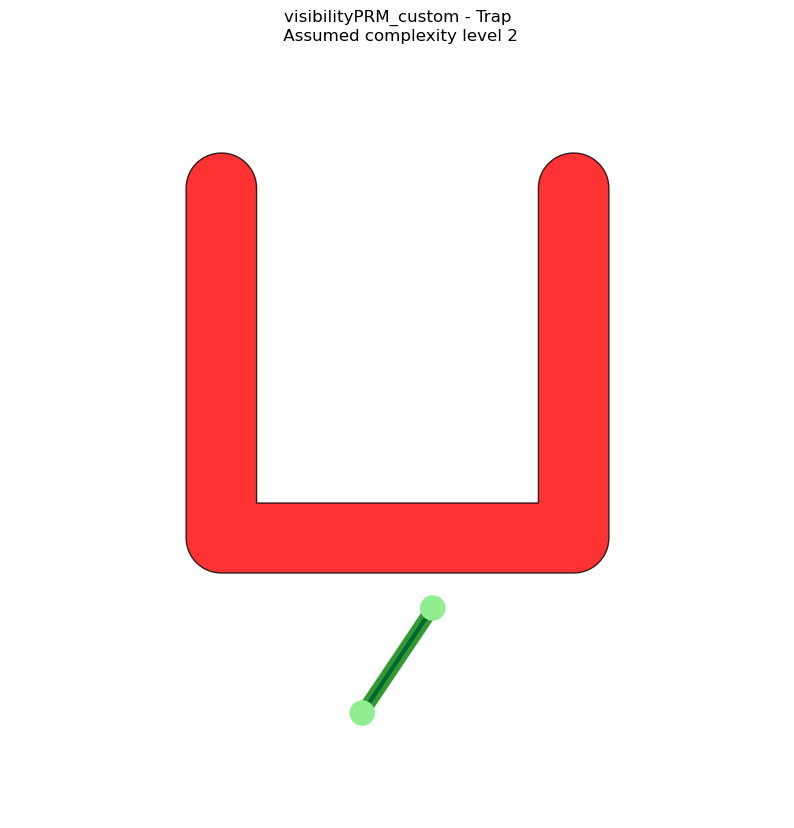

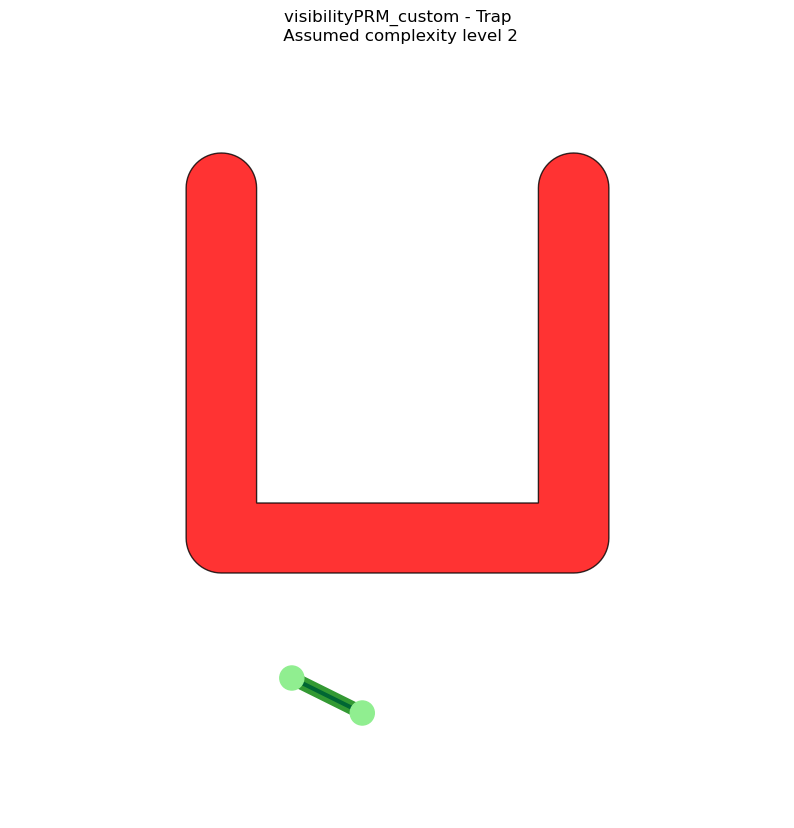

In [3]:
######
# Test
######

fullBenchList = IPTestSuiteSS2023.benchList
Environment_Test = fullBenchList[0]

test_startlist =[[10,15]] 
test_goallist = [[10,3], [12,6], [8,4]]

# Planen = roundtrip_path_planner.Roundtrip_Path_Planner(Environment_Test.startList, Environment_Test.goalList, Environment_Test ,"basePRM")
Planen = roundtrip_path_planner.Roundtrip_Path_Planner(test_startlist, test_goallist, Environment_Test ,"visibilityPRM_custom")
Planen.plan()
